In [10]:
!cp drive/'My Drive'/Group-Emotion-Recognition-master.zip /content

In [11]:
!cp drive/'My Drive'/model.h5 /content

In [12]:
!cp drive/'My Drive'/model.json /content

In [13]:
!unzip /content/Group-Emotion-Recognition-master.zip

Archive:  /content/Group-Emotion-Recognition-master.zip
19118ffa91bed3c0522d6eaced03c23182c4cbc0
replace Group-Emotion-Recognition-master/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Group-Emotion-Recognition-master/.gitignore  
  inflating: Group-Emotion-Recognition-master/AlignDlib.py  
  inflating: Group-Emotion-Recognition-master/Bayesian Network.ipynb  
  inflating: Group-Emotion-Recognition-master/CNN.ipynb  
  inflating: Group-Emotion-Recognition-master/Evaluation.ipynb  
  inflating: Group-Emotion-Recognition-master/Image Preprocessing.ipynb  
  inflating: Group-Emotion-Recognition-master/LICENSE  
  inflating: Group-Emotion-Recognition-master/README.md  
  inflating: Group-Emotion-Recognition-master/bayesian_network.py  
  inflating: Group-Emotion-Recognition-master/classify_image.py  
  inflating: Group-Emotion-Recognition-master/cnn.py  
  inflating: Group-Emotion-Recognition-master/deploy.prototxt.txt  
  inflating: Group-Emotion-Recognition-master/evalu

In [14]:
!cp Group-Emotion-Recognition-master/requirements.txt /content

In [15]:
pip install -r requirements.txt

In [16]:
!wget https://github.com/salamullahuet/Group-Emotion-Recognition/blob/master/Evaluation.ipynb

--2021-03-18 10:42:50--  https://github.com/salamullahuet/Group-Emotion-Recognition/blob/master/Evaluation.ipynb
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Evaluation.ipynb.2’

Evaluation.ipynb.2      [ <=>                ] 105.90K  --.-KB/s    in 0.02s   

2021-03-18 10:42:50 (4.92 MB/s) - ‘Evaluation.ipynb.2’ saved [108443]



In [17]:
!wget https://github.com/salamullahuet/Group-Emotion-Recognition.git

--2021-03-18 10:42:52--  https://github.com/salamullahuet/Group-Emotion-Recognition.git
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/salamullahuet/Group-Emotion-Recognition [following]
--2021-03-18 10:42:52--  https://github.com/salamullahuet/Group-Emotion-Recognition
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Group-Emotion-Recognition.git.2’

Group-Emotion-Recog     [ <=>                ] 181.24K  --.-KB/s    in 0.02s   

2021-03-18 10:42:53 (8.68 MB/s) - ‘Group-Emotion-Recognition.git.2’ saved [185594]



In [18]:
!cp Group-Emotion-Recognition-master/image_preprocessing.py /content

In [19]:
!cp Group-Emotion-Recognition-master/AlignDlib.py /content

In [20]:
!cp Group-Emotion-Recognition-master/deploy.prototxt.txt /content

In [21]:
!cp Group-Emotion-Recognition-master/res10_300x300_ssd_iter_140000.caffemodel /content

In [22]:
!cp Group-Emotion-Recognition-master/shape_predictor_68_face_landmarks.dat /content

In [23]:
import os
import sys
import glob
import numpy as np
import image_preprocessing
import cnn
import bayesian_network
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools

%matplotlib inline

W0318 10:43:14.027036 140102637442944 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/mtcnn/mtcnn.py:187: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0318 10:43:14.038476 140102637442944 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/mtcnn/mtcnn.py:193: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0318 10:43:14.088537 140102637442944 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/mtcnn/network.py:43: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0318 10:43:14.089343 140102637442944 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/mtcnn/layer_factory.py:87: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0318 10:43:14.093231 140102637442944 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/mtcnn/layer_factory.py:7

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Credit: https://github.com/scikit-learn/scikit-learn/blob/master/examples/model_selection/plot_confusion_matrix.py
    """
    np.set_printoptions(precision=2)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [25]:
classes = {"Positive": 0, "Neutral": 1, "Negative": 2, "None": 3}
def classify_image(image_folder_path, image_name, real_label, cnn_model, bayesian_model, labels_list):
    with open('val_labels.json', mode='r', encoding='utf-8') as f:
        image_labels_dict = json.load(f)
    labels = image_labels_dict[image_name]

    print("salamaaaaaaakhannn")
#     print(labels)

    # preprocess the image
    image_preprocessing.preprocess(image_folder_path, image_name)

    # get mean cnn predictions for the faces from the image
    cnn_label, cnn_dict, faces_detected = cnn.predict_image(cnn_model, image_folder_path + "Aligned/", image_name)

    # get the bayesian and bayesian + cnn predictions for the image
    bayesian_label, bayesian_cnn_label, emotion_dict, emotion_cnn_dict = bayesian_network.inference(bayesian_model, labels_list, labels, cnn_label)

#     print("Faces detected: " + str(faces_detected))
#     print("Real Label: " + str(real_label))
#     print("CNN Label: " + str(cnn_label))
    print("Bayesian Label: " + str(bayesian_label))
#     print("Bayesian + CNN Label: " + str(bayesian_cnn_label))

    return classes[real_label], classes[str(cnn_label)], classes[str(bayesian_label)], classes[str(bayesian_cnn_label)], faces_detected

In [26]:
import image_preprocessing
import cnn
import bayesian_network

In [27]:
print("salamaaaaaaakhannn")
cnn_model = cnn.load_model()
bayesian_model, labels_list = bayesian_network.load_model()

W0318 10:43:30.592439 140102637442944 deprecation.py:506] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


salamaaaaaaakhannn
Loaded CNN model from disk
True


In [28]:

def evaluate(image_folder_path, real_label):
    print("salamaaaaaaakhannn")
    predictions = []
    i = 0
    for file in sorted(glob.glob(image_folder_path + "*.jpg")):
        image_name = (file.split('/'))[-1]
        print("Image: " + image_name)
        prediction = {"Image": image_name}
        prediction["Actual"], prediction["CNN"], prediction["Bayesian"], prediction["Bayesian + CNN"], prediction["Faces Detected"] = classify_image(image_folder_path, image_name, real_label, cnn_model, bayesian_model, labels_list)
        predictions.append(prediction)
        i+=1
        if (i==100): 
            break
    return predictions

In [29]:
!mkdir input

mkdir: cannot create directory ‘input’: File exists


In [30]:
!unzip /content/drive/MyDrive/alignv.zip

Streaming output truncated to the last 5000 lines.
  inflating: val/Positive/pos_332_0.jpg  
  inflating: val/Positive/pos_332_1.jpg  
  inflating: val/Positive/pos_332_2.jpg  
  inflating: val/Positive/pos_332_3.jpg  
  inflating: val/Positive/pos_332_4.jpg  
  inflating: val/Positive/pos_332_5.jpg  
  inflating: val/Positive/pos_333_0.jpg  
  inflating: val/Positive/pos_333_1.jpg  
  inflating: val/Positive/pos_334_0.jpg  
  inflating: val/Positive/pos_334_1.jpg  
  inflating: val/Positive/pos_334_2.jpg  
  inflating: val/Positive/pos_334_3.jpg  
  inflating: val/Positive/pos_334_4.jpg  
  inflating: val/Positive/pos_334_5.jpg  
  inflating: val/Positive/pos_334_6.jpg  
  inflating: val/Positive/pos_335_0.jpg  
  inflating: val/Positive/pos_335_1.jpg  
  inflating: val/Positive/pos_335_10.jpg  
  inflating: val/Positive/pos_335_11.jpg  
  inflating: val/Positive/pos_335_12.jpg  
  inflating: val/Positive/pos_335_13.jpg  
  inflating: val/Positive/pos_335_2.jpg  
  inflating: val/Posi

In [31]:
!mv "/content/val" "/content/input"

mv: cannot move '/content/val' to '/content/input/val': Directory not empty


In [32]:
class_list = ['Positive', 'Neutral', 'Negative']
predictions_list = []
for emotion_class in class_list:
    predictions = evaluate('/input/val/' + emotion_class + '/', emotion_class)
    predictions_list += predictions
df = pd.DataFrame(predictions_list)
df.head()

salamaaaaaaakhannn
salamaaaaaaakhannn
salamaaaaaaakhannn


""


In [33]:
df.to_pickle('predictions_300')

In [34]:

df = pd.read_pickle('predictions_1_2_3_4')

In [35]:
y_true = df[["Actual"]]
y_pred_cnn = df[["CNN"]]
y_pred_bayesian = df[["Bayesian"]]
y_pred_bayesian_cnn = df[["Bayesian + CNN"]]

In [36]:
df.head()

,Actual,Bayesian,Bayesian + CNN,CNN,Faces Detected,Image
0,0,1,0,0,True,pos_1.jpg
1,0,0,0,0,True,pos_10.jpg
2,0,1,0,0,True,pos_100.jpg
3,0,0,0,1,True,pos_1000.jpg
4,0,1,1,0,True,pos_1001.jpg


Confusion matrix, without normalization
[[1473  152   55   67]
 [ 225  771  261  111]
 [ 253  351  549   78]
 [   0    0    0    0]]


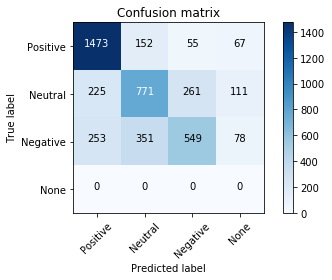

In [37]:
#plotting confusion matrix for cnn
cm = confusion_matrix(y_true, y_pred_cnn)
plt.figure()
plot_confusion_matrix(cm, classes=classes)
plt.show()

Confusion matrix, without normalization
[[989 654 104]
 [209 882 277]
 [145 304 782]]


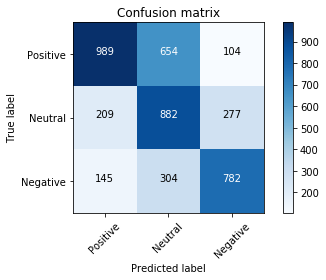

In [38]:
#Plot the confusion matrix for Bayesian network
cm = confusion_matrix(y_true, y_pred_bayesian)
plt.figure()
plot_confusion_matrix(cm, classes={"Positive": 0, "Neutral": 1, "Negative": 2})
plt.show()

Confusion matrix, without normalization
[[1128  531   88]
 [ 185  902  281]
 [ 122  302  807]]


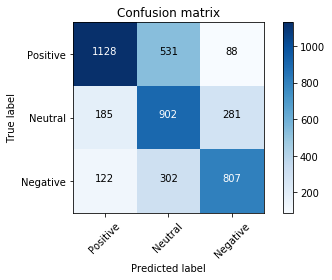

In [39]:
## Plot the confusion matrix for Bayesian network + CNN
cm = confusion_matrix(y_true, y_pred_bayesian_cnn)
plt.figure()
plot_confusion_matrix(cm, classes={"Positive": 0, "Neutral": 1, "Negative": 2})
plt.show()

In [40]:
##CNN Accuracy
accuracy_score(y_true, y_pred_cnn)

0.6426599171652094

In [41]:
##Bayesian Network Accuracy
accuracy_score(y_true, y_pred_bayesian)

0.6104463874827427

In [42]:
## Bayesian + CNN Accuracy
accuracy_score(y_true, y_pred_bayesian_cnn)

0.6527841693511275